In [1]:
import numpy as np
from gurobipy import *

In [2]:
print('Restricciones')
print(GRB.BINARY,GRB.CONTINUOUS)
print('Funcion Objetivo')
print(GRB.MAXIMIZE,GRB.MINIMIZE)


Restricciones
B C
Funcion Objetivo
-1 1


# Ejercicios de modelamiento

## Programacion Lineal

### Ejericio 1

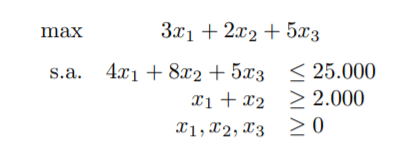

In [3]:
# se crea un modelo
m = Model('Ejercicio1')

Academic license - for non-commercial use only


In [4]:
#se crean las variables
x = m.addVar(vtype=GRB.CONTINUOUS,name='x')
y = m.addVar(vtype=GRB.CONTINUOUS,name='y')
z = m.addVar(vtype=GRB.CONTINUOUS,name='z')
m.setObjective(3*x+2*y+5*z,GRB.MAXIMIZE)
m.update()

In [5]:
m.addConstr(4*x+8*y+5*z<=25000,'c0')
m.addConstr(x+y>=2000,'c1')
m.addConstr(x>=0,'c2')
m.addConstr(y>=0,'c3')
m.addConstr(z>=0,'c4')

<gurobi.Constr *Awaiting Model Update*>

In [6]:
m.optimize()

Optimize a model with 5 rows, 3 columns and 8 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [2e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+03, 3e+04]
Presolve removed 3 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 3 columns, 5 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+04   5.000000e+02   0.000000e+00      0s
       1    2.3000000e+04   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  2.300000000e+04


In [7]:
if m.Status==GRB.OPTIMAL:
    print('Valor Optimo = ',m.ObjVal,
          '\nx*=',x.X,
          '\ny*=',y.X,
          '\nz*=',z.X)

Valor Optimo =  23000.0 
x*= 2000.0 
y*= 0.0 
z*= 3400.0


In [8]:
m.Status==GRB.OPTIMAL

True

In [9]:
m.getVars()

[<gurobi.Var x (value 2000.0)>,
 <gurobi.Var y (value 0.0)>,
 <gurobi.Var z (value 3400.0)>]

### Ejercicio 2

In [82]:
from itertools import product
from IPython.display import display
%matplotlib inline

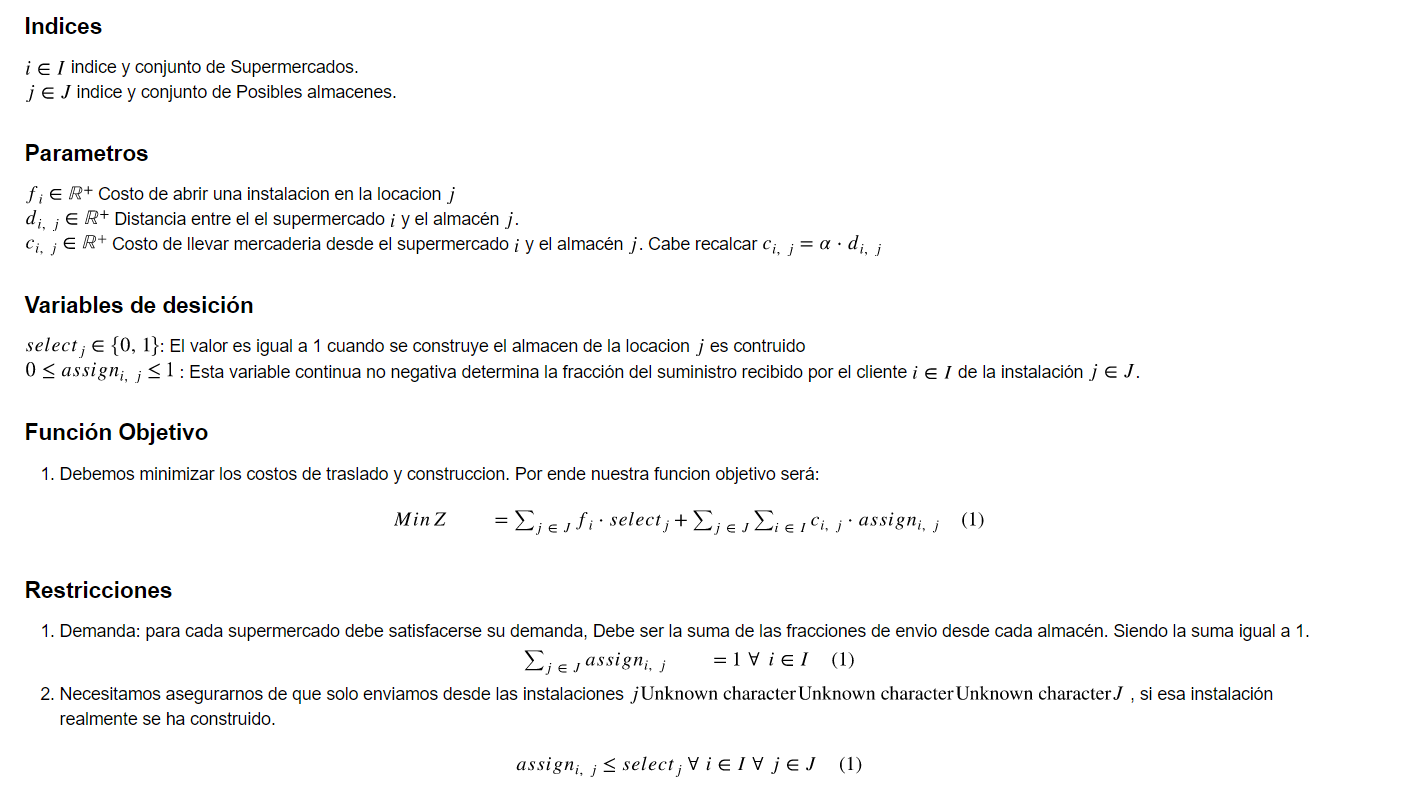

In [109]:


supermercados = [(0,1.5), (2.5,1.2),(5,5)]
almacenes = [(6,4), (3,7), (4,4), (3,0), (5,1), (1,7), (6,0), (2,1), (2,2),(7,8),(6,6)]
costo_constu = [3,2,3,1,3,3,4,3,2,2,1]
costo_por_km = 2

def distancia(loc1, loc2):
    dx = loc1[0] - loc2[0]
    dy = loc1[1] - loc2[1]
    return np.sqrt(dx*dx + dy*dy)
#Generamos las llaves de los indices compuestos {i,j}
num_almacenes = len(almacenes)
num_super     = len (supermercados)
# i; supermercados
# j; almacenes
producto_cart = list(product(range(num_super),range(num_almacenes)))

In [110]:
producto_cart

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10)]

In [111]:
#Costo de envios
costo_envio = {(i,j): costo_por_km*distancia(supermercados[i], almacenes[j]) for i, j in producto_cart}
print(costo_envio)

{(0, 0): 13.0, (0, 1): 12.529964086141668, (0, 2): 9.433981132056603, (0, 3): 6.708203932499369, (0, 4): 10.04987562112089, (0, 5): 11.180339887498949, (0, 6): 12.36931687685298, (0, 7): 4.123105625617661, (0, 8): 4.123105625617661, (0, 9): 19.1049731745428, (0, 10): 15.0, (1, 0): 8.964373932405989, (1, 1): 11.643023662262308, (1, 2): 6.352952069707436, (1, 3): 2.6, (1, 4): 5.015974481593781, (1, 5): 11.981652640600128, (1, 6): 7.3999999999999995, (1, 7): 1.0770329614269007, (1, 8): 1.886796226411321, (1, 9): 16.30828010551695, (1, 10): 11.881077392223316, (2, 0): 2.8284271247461903, (2, 1): 5.656854249492381, (2, 2): 2.8284271247461903, (2, 3): 10.770329614269007, (2, 4): 8.0, (2, 5): 8.94427190999916, (2, 6): 10.198039027185569, (2, 7): 10.0, (2, 8): 8.48528137423857, (2, 9): 7.211102550927978, (2, 10): 2.8284271247461903}


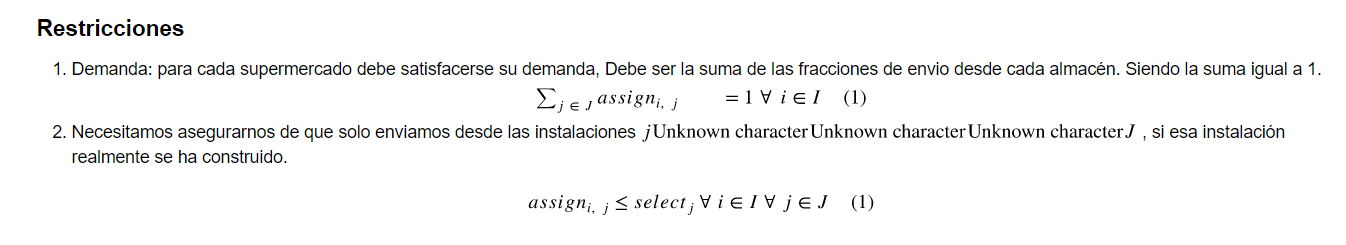

In [112]:
m = Model("Supermercados-Almacenes")
#.addVars sirve para ingrasar variables con indices, las cuales provienen de un diccionario
#variable  = m.addVars(numero_indices,)
seleccion  = m.addVars(list(range(num_almacenes)),vtype=GRB.BINARY,name='Seleccion')
asignacion = m.addVars(producto_cart,ub=1,vtype=GRB.CONTINUOUS,name='Asignacion')

In [113]:
print(list(range(num_almacenes)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [114]:
help(Model.addVar)


    ROUTINE:
      addVar(lb, ub, obj, vtype, name, column)

    PURPOSE:
      Add a variable to the model.

    ARGUMENTS:
      lb (float): Lower bound (default is zero)
      ub (float): Upper bound (default is infinite)
      obj (float): Objective coefficient (default is zero)
      vtype (string): Variable type (default is GRB.CONTINUOUS)
      name (string): Variable name (default is no name)
      column (Column): Initial coefficients for column (default is None)

    RETURN VALUE:
      The created Var object.

    EXAMPLE:
      v = model.addVar(ub=2.0, name="NewVar")
    


In [115]:
m.addConstrs((asignacion[(i,j)] <= seleccion[j] for i,j in producto_cart), name='Construccion/Encvio')
m.addConstrs((quicksum(asignacion[(i,j)] for j in range(num_almacenes)) == 1 for i in range(num_super)), name='Demanda')

m.setObjective(seleccion.prod(costo_constu)+asignacion.prod(costo_envio), GRB.MINIMIZE)

m.optimize()

Optimize a model with 36 rows, 44 columns and 99 nonzeros
Variable types: 33 continuous, 11 integer (11 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 26.1477744
Presolve time: 0.00s
Presolved: 36 rows, 44 columns, 99 nonzeros
Variable types: 33 continuous, 11 integer (11 binary)

Root relaxation: objective 1.183833e+01, 6 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      11.8383290   11.83833  0.00%     -    0s

Explored 0 nodes (6 simplex iterations) in 0.18 seconds
Thread count was 4 (of 4 available processors)

Solution count 2: 11.8383 26.1478 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.183832897678e+01, best bound 1.183832897678e+01, gap 0.0000%


In [116]:
m.getVars()

[<gurobi.Var Seleccion[0] (value -0.0)>,
 <gurobi.Var Seleccion[1] (value -0.0)>,
 <gurobi.Var Seleccion[2] (value -0.0)>,
 <gurobi.Var Seleccion[3] (value -0.0)>,
 <gurobi.Var Seleccion[4] (value -0.0)>,
 <gurobi.Var Seleccion[5] (value -0.0)>,
 <gurobi.Var Seleccion[6] (value -0.0)>,
 <gurobi.Var Seleccion[7] (value -0.0)>,
 <gurobi.Var Seleccion[8] (value 1.0)>,
 <gurobi.Var Seleccion[9] (value -0.0)>,
 <gurobi.Var Seleccion[10] (value 1.0)>,
 <gurobi.Var Asignacion[0,0] (value 0.0)>,
 <gurobi.Var Asignacion[0,1] (value 0.0)>,
 <gurobi.Var Asignacion[0,2] (value 0.0)>,
 <gurobi.Var Asignacion[0,3] (value 0.0)>,
 <gurobi.Var Asignacion[0,4] (value 0.0)>,
 <gurobi.Var Asignacion[0,5] (value 0.0)>,
 <gurobi.Var Asignacion[0,6] (value 0.0)>,
 <gurobi.Var Asignacion[0,7] (value 0.0)>,
 <gurobi.Var Asignacion[0,8] (value 1.0)>,
 <gurobi.Var Asignacion[0,9] (value 0.0)>,
 <gurobi.Var Asignacion[0,10] (value 0.0)>,
 <gurobi.Var Asignacion[1,0] (value 0.0)>,
 <gurobi.Var Asignacion[1,1] (val

In [128]:
# var.x es la variable optima del problema.
for almacen in seleccion.keys():
    if (abs(seleccion[almacen].x) > 0):
        print(f"\nSe debe contruir el almacen en la locacion {almacen}.")


Se debe contruir el almacen en la locacion 8.

Se debe contruir el almacen en la locacion 10.


In [127]:
if m.Status==GRB.OPTIMAL:
    print('Valor Optimo = ',m.ObjVal)
    for var in m.getVars():
        print(var.VarName,var.X)

Valor Optimo =  11.838328976775172
Seleccion[0] -0.0
Seleccion[1] -0.0
Seleccion[2] -0.0
Seleccion[3] -0.0
Seleccion[4] -0.0
Seleccion[5] -0.0
Seleccion[6] -0.0
Seleccion[7] -0.0
Seleccion[8] 1.0
Seleccion[9] -0.0
Seleccion[10] 1.0
Asignacion[0,0] 0.0
Asignacion[0,1] 0.0
Asignacion[0,2] 0.0
Asignacion[0,3] 0.0
Asignacion[0,4] 0.0
Asignacion[0,5] 0.0
Asignacion[0,6] 0.0
Asignacion[0,7] 0.0
Asignacion[0,8] 1.0
Asignacion[0,9] 0.0
Asignacion[0,10] 0.0
Asignacion[1,0] 0.0
Asignacion[1,1] 0.0
Asignacion[1,2] 0.0
Asignacion[1,3] 0.0
Asignacion[1,4] 0.0
Asignacion[1,5] 0.0
Asignacion[1,6] 0.0
Asignacion[1,7] 0.0
Asignacion[1,8] 1.0
Asignacion[1,9] 0.0
Asignacion[1,10] 0.0
Asignacion[2,0] 0.0
Asignacion[2,1] 0.0
Asignacion[2,2] 0.0
Asignacion[2,3] 0.0
Asignacion[2,4] 0.0
Asignacion[2,5] 0.0
Asignacion[2,6] 0.0
Asignacion[2,7] 0.0
Asignacion[2,8] 0.0
Asignacion[2,9] 0.0
Asignacion[2,10] 1.0


In [137]:
for const in m.getConstrs():
    print(const)

<gurobi.Constr Construccion/Encvio[0,0]>
<gurobi.Constr Construccion/Encvio[0,1]>
<gurobi.Constr Construccion/Encvio[0,2]>
<gurobi.Constr Construccion/Encvio[0,3]>
<gurobi.Constr Construccion/Encvio[0,4]>
<gurobi.Constr Construccion/Encvio[0,5]>
<gurobi.Constr Construccion/Encvio[0,6]>
<gurobi.Constr Construccion/Encvio[0,7]>
<gurobi.Constr Construccion/Encvio[0,8]>
<gurobi.Constr Construccion/Encvio[0,9]>
<gurobi.Constr Construccion/Encvio[0,10]>
<gurobi.Constr Construccion/Encvio[1,0]>
<gurobi.Constr Construccion/Encvio[1,1]>
<gurobi.Constr Construccion/Encvio[1,2]>
<gurobi.Constr Construccion/Encvio[1,3]>
<gurobi.Constr Construccion/Encvio[1,4]>
<gurobi.Constr Construccion/Encvio[1,5]>
<gurobi.Constr Construccion/Encvio[1,6]>
<gurobi.Constr Construccion/Encvio[1,7]>
<gurobi.Constr Construccion/Encvio[1,8]>
<gurobi.Constr Construccion/Encvio[1,9]>
<gurobi.Constr Construccion/Encvio[1,10]>
<gurobi.Constr Construccion/Encvio[2,0]>
<gurobi.Constr Construccion/Encvio[2,1]>
<gurobi.Constr